In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import os.path
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from pandas.tseries.offsets import MonthEnd
import math

In [2]:
cm = 1 / 2.54  # inches to cm
wu = 9*cm  # width unit
hu = 6*cm  # height unit

LEAST_SIZE = 7
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=LEAST_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
in_file = os.path.join(globals()['_dh'][0], "data/glaciation_statistics.csv")  # from CryoClim
fig_dir = os.path.join(globals()['_dh'][0], "fig")

In [4]:
db = np.genfromtxt(in_file, delimiter=",")
# print(db)
db = db / 1000000
print(len(db), "glaciers total")  # should be 1455
print("Min area:", np.min(db))
print("Max area", np.max(db))

1455 glaciers total
Min area: 0.046402320645
Max area 963.223583322248


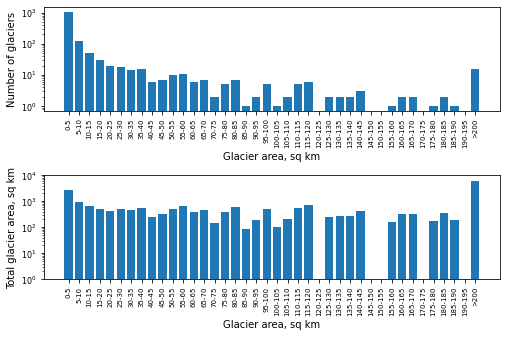

In [95]:
step = 5

end = step * math.ceil(np.max(db) / step) + step  # ceils to the nearest 5 and add more 5
b = range(0, end, step)
# print(b)

hist, bin_edges = np.histogram(db, bins=b)

# we will add up all the glaciers which area is more than a certain threshold:
max_area = 200
ind = int(np.where(bin_edges == max_area)[0])  # the index of a bin > 400 sq km
# print("Index:", ind)

new_hist = list(hist[:(ind-1)]) + [sum(hist[ind:])]

new_edges = list(bin_edges[:(ind-1)])
new_edges = ["%s-%s" % (x, y) for (x, y) in zip(new_edges[:], bin_edges[1:(ind)])]
new_edges += [">%s" % max_area]


fig, ax = plt.subplots(2, 1)
fig.set_size_inches(2*wu, 2*hu)

ax[0].bar(x=new_edges, height=new_hist)
ax[0].set_yscale("log")
ax[0].tick_params(axis='x', rotation=90)

ax[0].set_ylabel("Number of glaciers")
ax[0].set_xlabel("Glacier area, sq km")

# print(hist)
bin_areas = []  # the mean areas in the bin (max bin edge minus min bin edge)
for bin in bin_edges[1:]:
    bin_areas.append(bin - step / 2)
# print(bin_areas)

total_bin_areas = []
for count, area in zip(hist, bin_areas):
    # print(count, area)
    total_bin_areas.append(count * area)
# print(total_bin_areas)

ind = int(np.where(bin_edges == max_area)[0])  # the index of a bin > 400 sq km
# print("Index:", ind)

new_total_bin_areas = list(total_bin_areas[:(ind-1)]) + [sum(total_bin_areas[ind:])]
# print(new_total_bin_areas)

ax[1].bar(x=new_edges, height=new_total_bin_areas)
ax[1].set_yscale("log")
ax[1].tick_params(axis='x', rotation=90)

ax[1].set_ylim(1, 10000)
ax[1].set_ylabel("Total glacier area, sq km")
ax[1].set_xlabel("Glacier area, sq km")

# print(sum(new_total_bin_areas[:-1]))  # the total area of 99% of the glaciers

fig.tight_layout()

fig_paths = ("glacier_histogram_log-scale.png", "glacier_histogram_log-scale.pdf")
# fig_paths = ("glacier_histogram_lin-scale.png", "glacier_histogram_lin-scale.pdf")
for fig_path in fig_paths:
    plt.savefig(os.path.join(fig_dir, fig_path), dpi=300, transparent=False, facecolor="white")

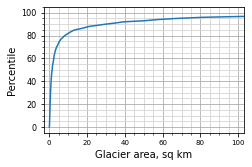

In [70]:
step = 5

end = step * math.ceil(np.max(db) / step) + step  # ceils to the nearest 5 and add more 5
b = range(0, end, step)

hist, bin_edges = np.histogram(db, bins=b)

p_range = range(0, 101, 1)
p_values = []
for p in p_range:
    p_values.append(round(np.percentile(db, p), 2))

# we will add up all the glaciers which area is more than a certain threshold:
max_area = 200
ind = int(np.where(bin_edges == max_area)[0])  # the index of a bin > 400 sq km


new_hist = list(hist[:(ind-1)]) + [sum(hist[ind:])]

new_edges = list(bin_edges[:(ind-1)])
new_edges = ["%s-%s" % (x, y) for (x, y) in zip(new_edges[:], bin_edges[1:(ind)])]
new_edges += [">%s" % max_area]


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(1*wu, 1*hu)


ax.grid(True, which='major', color="darkgrey")
ax.grid(True, which='minor', color="lightgrey")
plt.minorticks_on()
ax.plot(p_values, p_range)
# print(p_values, p_range)
ax.set_xlim(-3, 103)
ax.set_ylabel("Percentile")
ax.set_xlabel("Glacier area, sq km")

fig.tight_layout()

fig_paths = ("glacier_area_percentile.png", "glacier_area_percentile.pdf")
for fig_path in fig_paths:
    plt.savefig(os.path.join(fig_dir, fig_path), dpi=300, transparent=False, facecolor="white")